In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

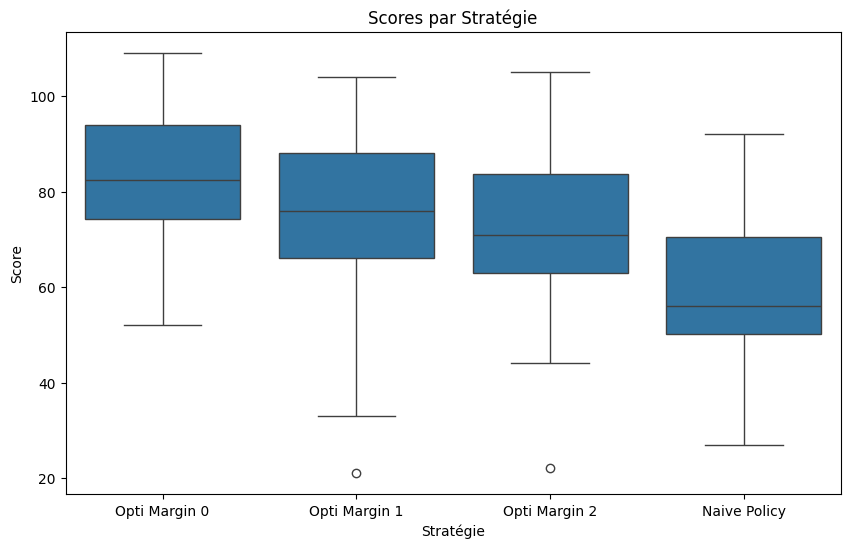

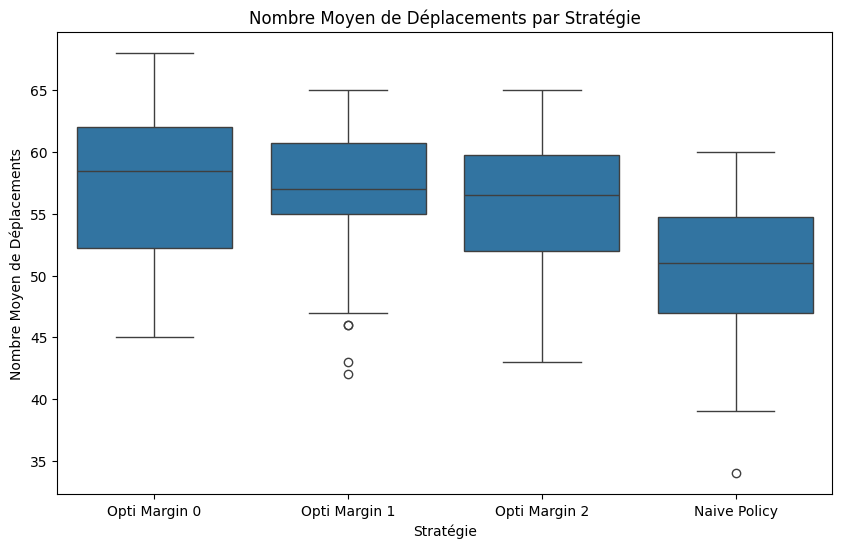

<Figure size 1200x800 with 0 Axes>

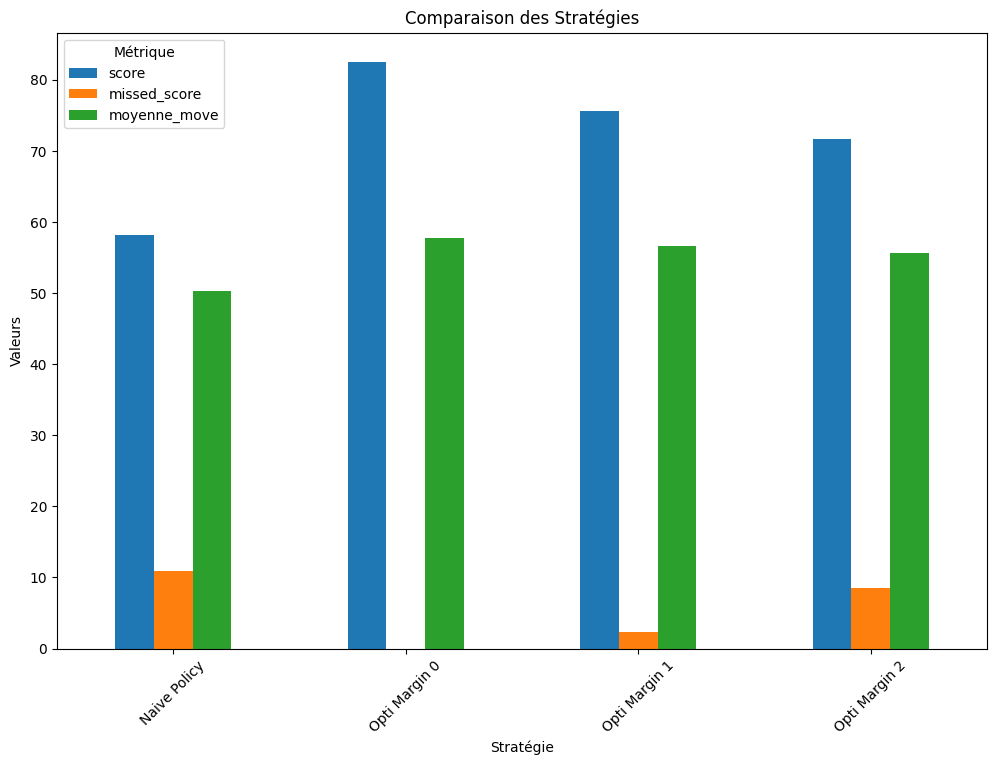

In [5]:

# Charger les fichiers CSV
file_paths = ['data/optiMargin0.csv', 'data/optiMargin1.csv', 'data/optiMargin2.csv', 'data/dataNaivePolicy.csv']
strategies = ['Opti Margin 0', 'Opti Margin 1', 'Opti Margin 2', 'Naive Policy']

# Lire les fichiers CSV
dataframes = {}
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes[file_path] = df

# Ajouter une colonne 'strategy' à chaque DataFrame
for file_path, strategy in zip(file_paths, strategies):
    dataframes[file_path]['strategy'] = strategy

# Concaténer tous les DataFrames
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Box plot pour les scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='score', data=combined_df)
plt.title('Scores par Stratégie')
plt.xlabel('Stratégie')
plt.ylabel('Score')
plt.show()

# Box plot pour le nombre moyen de déplacements
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='moyenne_move', data=combined_df)
plt.title('Nombre Moyen de Déplacements par Stratégie')
plt.xlabel('Stratégie')
plt.ylabel('Nombre Moyen de Déplacements')
plt.show()

# Bar plot pour score, score raté et moyenne des déplacements
plt.figure(figsize=(12, 8))
combined_df_grouped = combined_df.groupby('strategy').mean()
combined_df_grouped.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Comparaison des Stratégies')
plt.xlabel('Stratégie')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.legend(title='Métrique', loc='upper left')
plt.show()